In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

C:\Users\hp\AppData\Local\Temp\ipykernel_9632\616101633.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df= pd.read_csv('panama_dataset.csv')
df.dropna(inplace=True)
describe = df.describe()
print(describe)


       target_variable       T2M_toc      QV2M_toc       TQL_toc       W2M_toc
count     48048.000000  48048.000000  48048.000000  48048.000000  48048.000000
mean       1182.868647     27.399111      0.018313      0.079979     13.391049
std         192.068896      1.675462      0.001607      0.065589      7.295502
min          85.192500     22.953455      0.012054      0.000000      0.008979
25%        1020.056900     26.160455      0.017236      0.026451      7.544958
50%        1168.427700     27.118051      0.018590      0.065201     12.182103
75%        1327.563950     28.558344      0.019521      0.117310     18.661282
max        1754.882000     35.039575      0.022690      0.521240     39.229726


In [3]:
df.shape

(48048, 5)

In [4]:
x = df
y = df["target_variable"]
df.shape
s1 = MinMaxScaler(feature_range=(0,1))
Xs = s1.fit_transform(df)
s2 = MinMaxScaler(feature_range=(0,1))
ys = s2.fit_transform(df[['target_variable']])

In [5]:
window= 5
X=[]
Y=[]
for i in range(window,len(Xs)):
    X.append(Xs[i-window:i,:])#The sequence starts from i-window and ends at i. It includes all columns of the data.
    Y.append(ys[i])
X,Y = np.array(X), np.array(Y)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, shuffle=False)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
import tensorflow as tf    

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=32, return_sequences=True,input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.LSTM(units=32,return_sequences=True),
    tf.keras.layers.LSTM(units=32,return_sequences=True),
    tf.keras.layers.LSTM(units=32,return_sequences=True),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(units=1, activation='linear', name='output_layer')
])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_absolute_error')


1051/1051 [==============================] - 34s 19ms/step - loss: 0.0899 - val_loss: 0.0437
Epoch 1/200 - Train Loss: 0.0899 - Val Loss: 0.0437
1051/1051 [==============================] - 19s 18ms/step - loss: 0.0388 - val_loss: 0.0235
Epoch 2/200 - Train Loss: 0.0388 - Val Loss: 0.0235
1051/1051 [==============================] - 18s 17ms/step - loss: 0.0290 - val_loss: 0.0176
Epoch 3/200 - Train Loss: 0.0290 - Val Loss: 0.0176
1051/1051 [==============================] - 18s 17ms/step - loss: 0.0256 - val_loss: 0.0174
Epoch 4/200 - Train Loss: 0.0256 - Val Loss: 0.0174
1051/1051 [==============================] - 18s 17ms/step - loss: 0.0230 - val_loss: 0.0181
Epoch 5/200 - Train Loss: 0.0230 - Val Loss: 0.0181
1051/1051 [==============================] - 18s 17ms/step - loss: 0.0216 - val_loss: 0.0159
Epoch 6/200 - Train Loss: 0.0216 - Val Loss: 0.0159
1051/1051 [==============================] - 18s 17ms/step - loss: 0.0196 - val_loss: 0.0234
Epoch 7/200 - Train Loss: 0.0196 - V

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


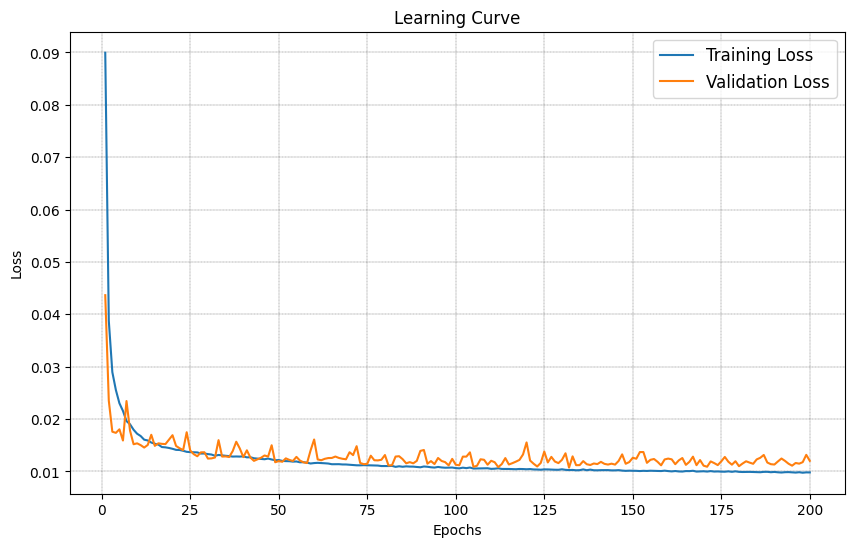

In [9]:
import time

import matplotlib.pyplot as plt

train_losses = []
val_losses = []

start = time.time()
epochs = 200

for epoch in range(epochs):
    history = model.fit(X_train, y_train, epochs=1, validation_data=(X_test, y_test), 
                        verbose=1, batch_size=32)
    

    train_loss = history.history['loss'][0]
    val_loss = history.history['val_loss'][0]
    
    train_losses.append(train_loss)
    val_losses.append(val_loss)

    # Print progress
    print(f'Epoch {epoch + 1}/{epochs} - Train Loss: {train_loss:.4f} - Val Loss: {val_loss:.4f}')

end = time.time()
convergence_time = end - start


plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.grid(color = 'black', linestyle = '--', linewidth = 0.2)
plt.legend(prop={"size":12})
plt.grid(True)
plt.savefig('PANAMA_LSTM_learning.eps',bbox_inches='tight')
plt.savefig('PANAMA_LSTM_learning.pdf',bbox_inches='tight')
plt.show()

In [10]:
start= time.time()
y_pred= model.predict(X_test)
end= time.time()
inference_time= end-start

451/451 [==============================] - 5s 6ms/step


In [11]:
y_pred = s2.inverse_transform(y_pred)
y_test = s2.inverse_transform(y_test)

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error

In [13]:

rmse= np.sqrt(mean_squared_error(y_test, y_pred))
mae =  mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)*100
mse= mean_squared_error(y_test, y_pred)
nrmse = (rmse/np.mean(y_pred))*100
print("conergence time is:", convergence_time)
print("inference time is:",inference_time)
print("RMSE: ", rmse)
print("mae", mae)
print("mape", mape)
print("mse",mse)
print("nrmse", nrmse)

conergence time is: 3972.433309316635
inference time is: 5.945065259933472
RMSE:  30.58423064355808
mae 20.091666356015946
mape 1.7578017250955318
mse 935.395164058357
nrmse 2.5262853550158155


In [14]:
y_pred= pd.DataFrame(y_pred)
y_test= pd.DataFrame(y_test)

In [15]:
plot_pred = (y_test, y_pred)
plot_pred

(               0
 0      1095.8832
 1      1103.3723
 2      1093.0514
 3      1076.4971
 4      1059.7551
 ...          ...
 14408  1128.5592
 14409  1112.7488
 14410  1081.5680
 14411  1041.6240
 14412  1013.5683
 
 [14413 rows x 1 columns],
                  0
 0      1116.133423
 1      1101.851685
 2      1100.197388
 3      1083.484375
 4      1074.552368
 ...            ...
 14408  1123.594604
 14409  1110.660645
 14410  1070.485352
 14411  1031.449341
 14412  1010.679016
 
 [14413 rows x 1 columns])

In [16]:
result_df = pd.concat([y_pred, y_test], axis=1)
result_df.to_csv(r"C:\Users\hp\Desktop\New folder\PANAMA\LSTM_output(p1).csv", index=False)